<a href="https://colab.research.google.com/github/Tibebuga/Deep_learning/blob/main/animal_age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
!pip install shap
!pip install explainerdashboard

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pycaret.datasets import get_data
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
#data = get_data('boston')
df = pd.read_excel('/content/drive/MyDrive/Upwork-project-prediction/excel_correct_DOB.xlsx')
# returns the first 5 rows
#df.head()

In [ ]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['Date of Weigh'] = pd.to_datetime(df['Date of Weigh'])
 #Calculate age in years
df['Age'] = (df['Date of Weigh'] - df['DOB']).dt.days / 365.25  # dividing by average days in a year
df_cleaned = df.dropna()  # Drop rows with missing values
df_filtered = df_cleaned[(df_cleaned['Age'] >= 0)&(df_cleaned['Species'] == 'Cynomolgus')& (df_cleaned['Origin'] == 'Cambodia')&(df_cleaned['Weigh'] < 10)& (df_cleaned['Sex'] == 'F') & (df_cleaned['Status'] == 'Alive')]
#(df_cleaned['Age'] > 1) &(df_cleaned['Age'] <=5)&
#df_filtered.info()
X = df_filtered[['Age']]  # Age of animals
y = df_filtered[['Weigh']] # Weight of animals
data = X.join(y)

df.dropna(subset=['Weigh'], inplace=True)

In [ ]:
df_cleaned[(df_cleaned['Age'] ==0)]#.shape

,AnimalID,Sex,Species,Origin,Lot,DOB,Date of Weigh,Weigh,Location at the Time of Weighting,Current Location,Diarrhea in the past 30 days from weight collection,Status,Age
29,0410040A,F,Cynomolgus,USA,WWP-13,2013-05-31,2013-05-31,1.36,InactiveMiami,InactiveMiami,No,Dead,0.0
51,0411028B,F,Cynomolgus,Indonesia,WWP-13,2013-06-03,2013-06-03,1.08,InactiveMiami,InactiveMiami,No,Dead,0.0
796,091535A,F,Cynomolgus,Cambodia,WWP-12,2012-05-01,2012-05-01,2.84,59,FC-99,No,Alive,0.0
904,1005,M,Common Marmoset,South Africa,wwp-16,2016-08-25,2016-08-25,0.00,InactiveMiami,InactiveMiami,No,Dead,0.0
1073,102276A,F,Cynomolgus,Cambodia,WWP-13,2013-02-14,2013-02-14,0.30,InactiveMiami,InactiveMiami,No,Sold,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41497,9-668,F,Cynomolgus,Cambodia,WWP-14,2014-05-08,2014-05-08,0.30,InactiveMiami,InactiveMiami,No,Sold,0.0
41519,9-670,F,Cynomolgus,Cambodia,WWP-14,2014-05-05,2014-05-05,0.30,InactiveMiami,InactiveMiami,No,Sold,0.0
41534,9-671,F,Cynomolgus,Cambodia,WWP-14,2014-04-01,2014-04-01,0.30,InactiveMiami,InactiveMiami,No,Sold,0.0
41549,A09541A,M,Cynomolgus,Vietnam,WWP-13,2013-05-25,2013-05-25,0.30,InactiveMiami,InactiveMiami,No,Sold,0.0


In [ ]:
df_neg_all=df_cleaned[(df_cleaned['Age'] < 0)]
#df_neg=df_filtered[(df_filtered['Age'] < 0)]
#df_neg_all.to_csv('df_neg_all.csv', index=False)

#from google.colab import files
#files.download('df_neg_all.csv')

In [ ]:
df_filtered = df_filtered.drop(columns=['Lot'])
df_filtered = df_filtered.drop(columns=['Current Location'])
#df_filtered = df_filtered.drop(columns=['Date of Weigh'])
#df_filtered = df_filtered.drop(columns=['DOB'])
#df_filtered = df_filtered.drop(columns=['Location at the Time of Weighting'])
df_filtered = df_filtered.drop(columns=['AnimalID'])

In [ ]:
reg_setup = setup(data=df_filtered, target='Age', preprocess='auto',normalize=True,imputation_type='iterative', session_id=42)


,Description,Value
0,Session id,42
1,Target,Age
2,Target type,Regression
3,Original data shape,"(4867, 10)"
4,Transformed data shape,"(4867, 19)"
5,Transformed train set shape,"(3406, 19)"
6,Transformed test set shape,"(1461, 19)"
7,Numeric features,1
8,Date features,2
9,Categorical features,6


In [ ]:
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost, optimize='RMSE')
# Finalize the model
final_model = finalize_model(tuned_xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0646,0.0097,0.0983,0.9945,0.0455,0.1818
1,0.0798,0.0807,0.2840,0.9474,0.1073,0.1716
2,0.0747,0.0163,0.1276,0.9900,0.0548,0.1502
3,0.0757,0.0339,0.1840,0.9758,0.0699,0.1235
4,0.0745,0.0251,0.1585,0.9872,0.0529,0.2438
5,0.0707,0.0209,0.1446,0.9880,0.0458,0.1360
6,0.0753,0.0241,0.1551,0.9886,0.0531,0.1526
7,0.0629,0.0124,0.1112,0.9929,0.0423,0.1391
8,0.0626,0.0186,0.1364,0.9862,0.0437,0.1100


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0954,0.0222,0.1490,0.9873,0.0579,0.2500
1,0.1168,0.1152,0.3394,0.9249,0.1282,0.4051
2,0.0893,0.0183,0.1354,0.9887,0.0627,0.2437
3,0.0941,0.0387,0.1968,0.9723,0.0795,0.3168
4,0.0996,0.0299,0.1730,0.9847,0.0623,0.3236
5,0.0955,0.0283,0.1681,0.9838,0.0623,0.1906
6,0.1058,0.0411,0.2027,0.9805,0.0603,0.1922
7,0.0824,0.0173,0.1317,0.9900,0.0579,0.2355
8,0.0854,0.0229,0.1512,0.9831,0.0576,0.1497


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

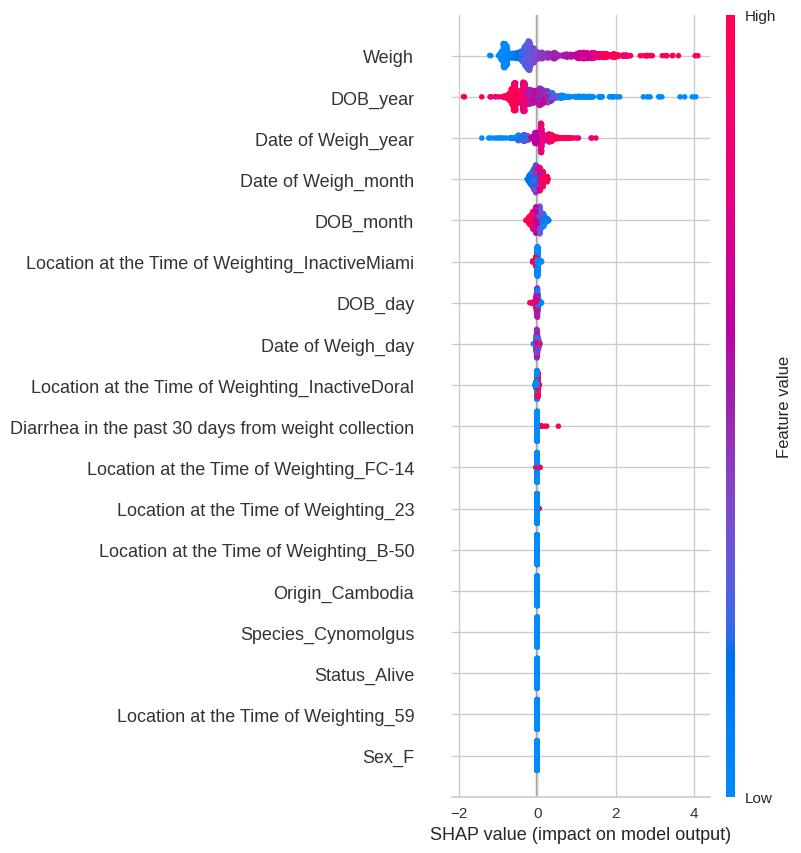

In [ ]:
interpret_model(tuned_xgboost)

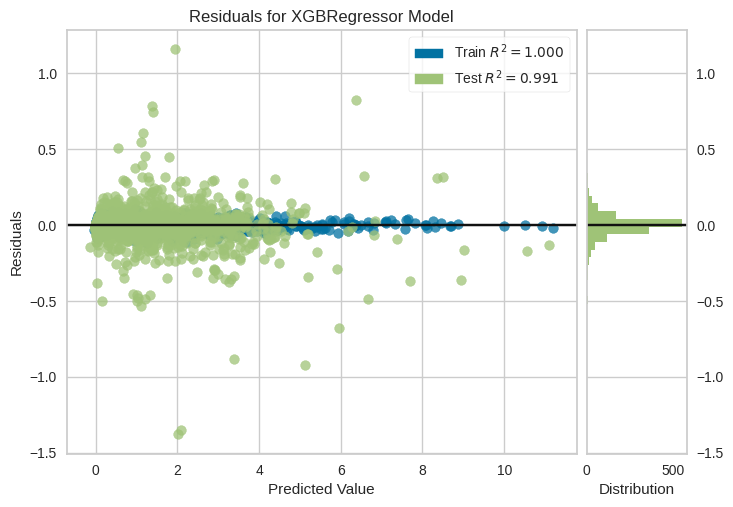

In [ ]:
# plot residuals
plot_model(xgboost, plot = 'residuals')

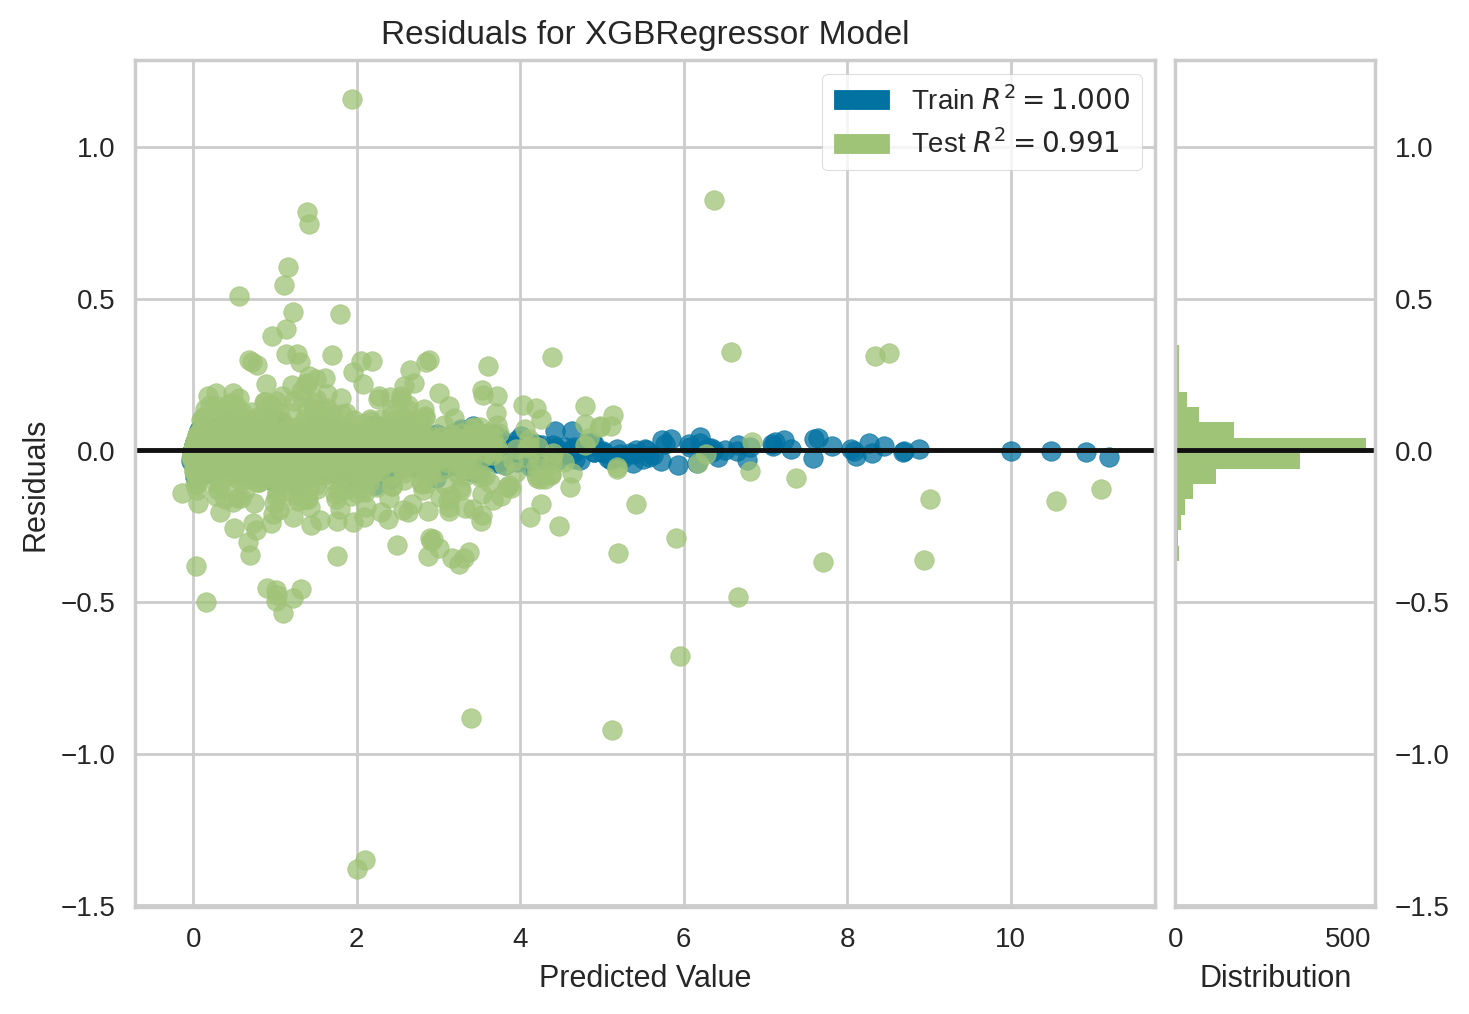

In [ ]:
# to control the scale of plot
plot_model(xgboost, plot = 'residuals', scale = 2)

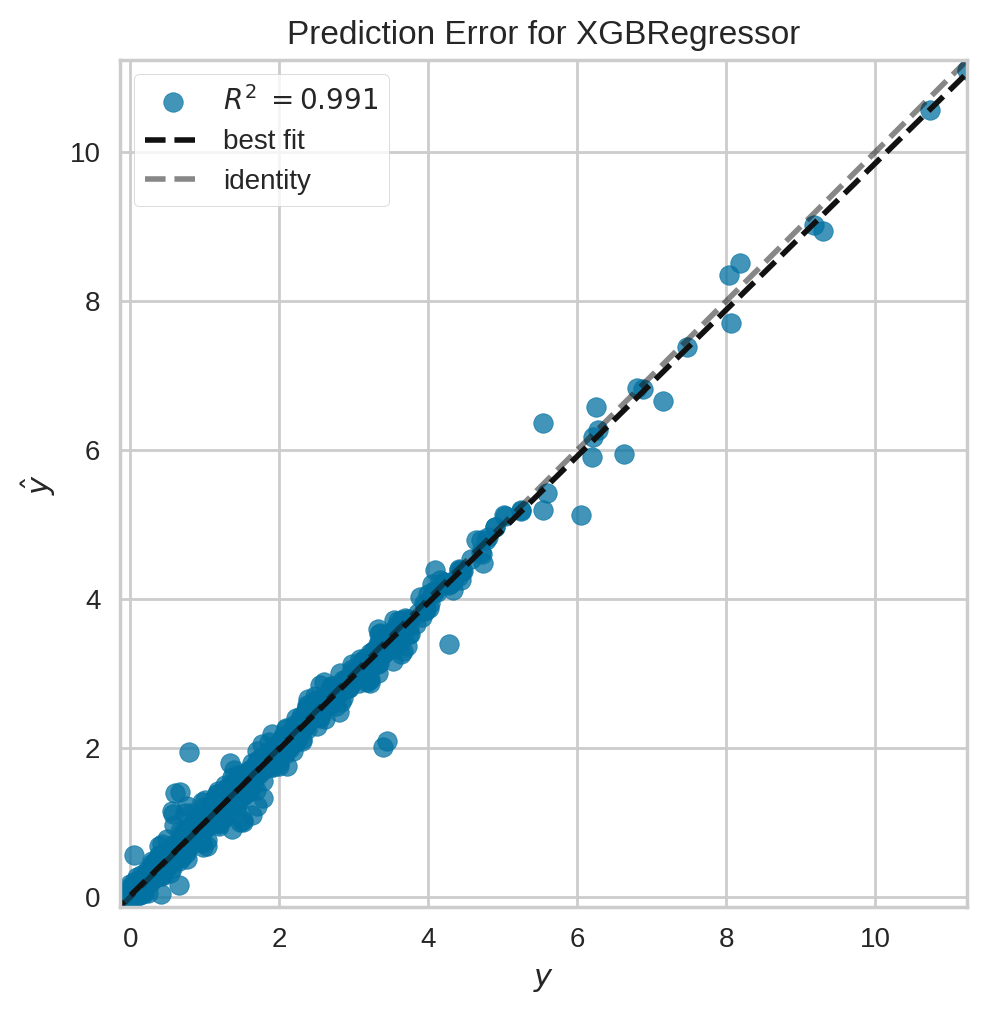

In [ ]:
# plot error
plot_model(xgboost, plot = 'error', scale = 2)


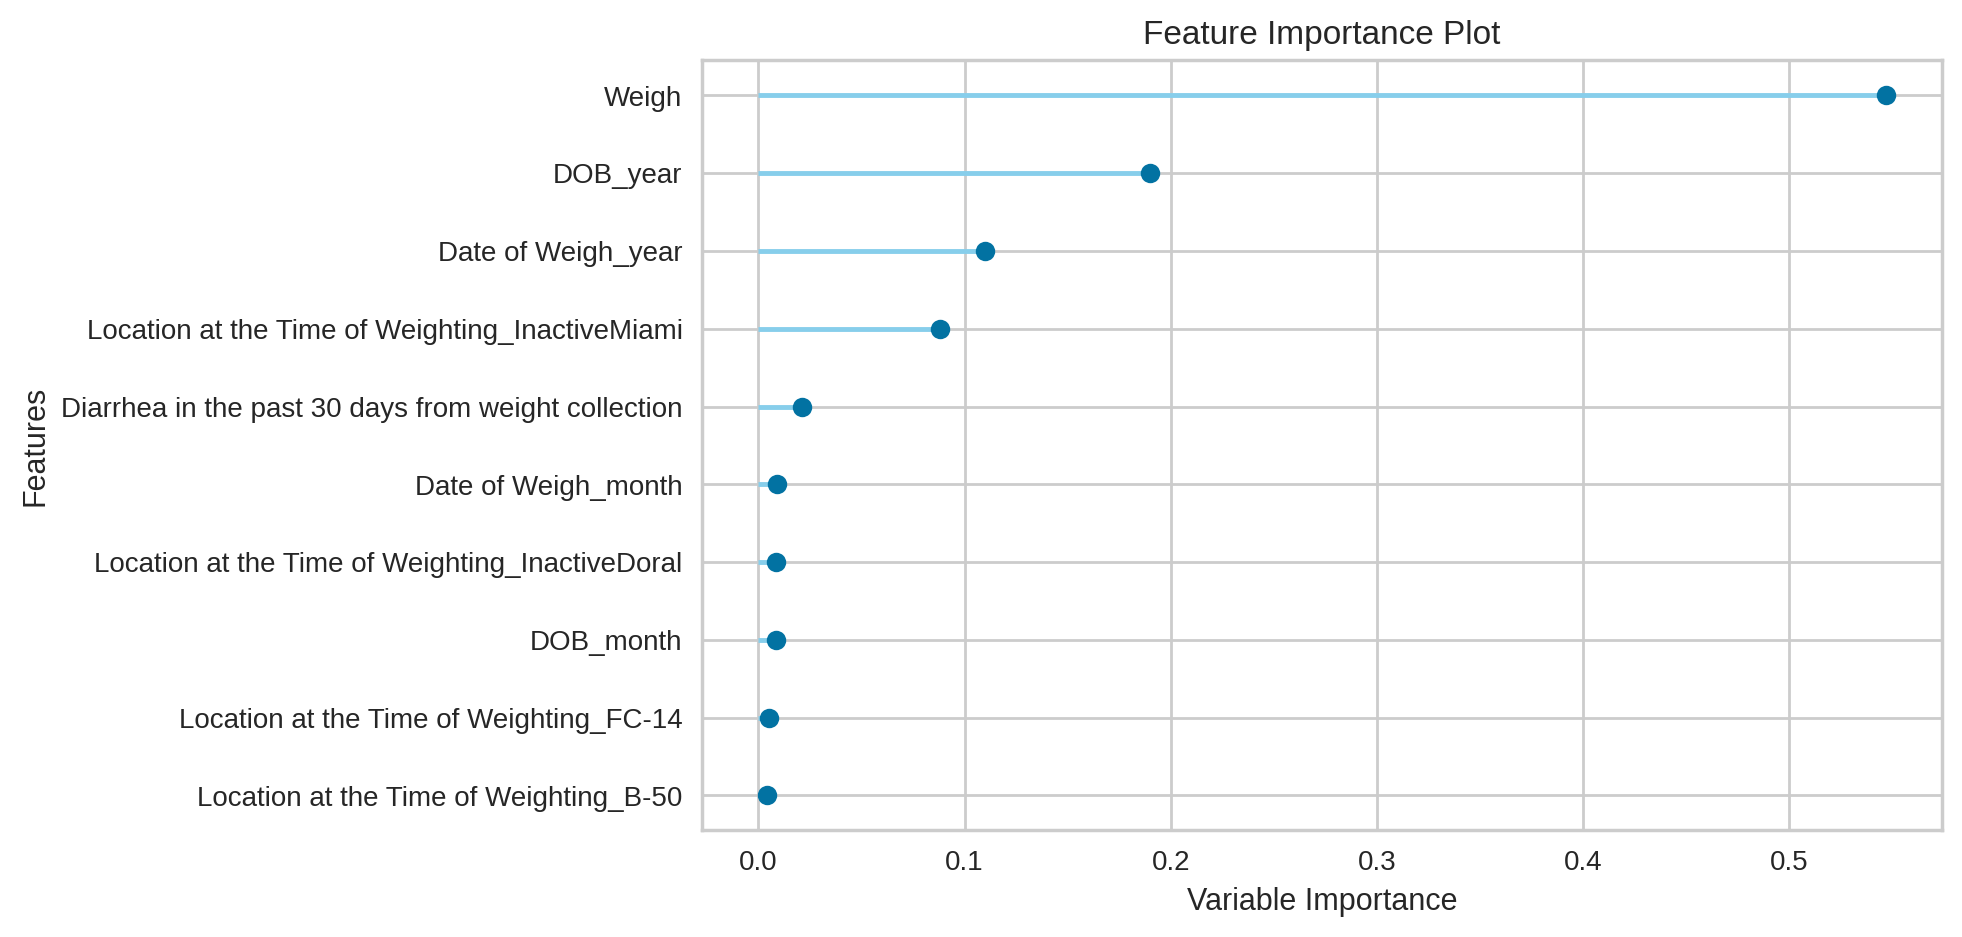

In [ ]:
# plot feature importance
plot_model(xgboost, plot = 'feature', scale = 2)

In [ ]:
# predict on test set
holdout_pred = predict_model(xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.0664,0.0161,0.1267,0.9909,0.0520,0.1668


In [ ]:
# show predictions df
holdout_pred.head()

,Sex,Species,Origin,DOB,Date of Weigh,Weigh,Location at the Time of Weighting,Diarrhea in the past 30 days from weight collection,Status,Age,prediction_label
18680,F,Cynomolgus,Cambodia,2021-01-01,2021-10-18,1.35,InactiveMiami,No,Alive,0.793977,0.810849
38929,F,Cynomolgus,Cambodia,2023-07-05,2023-12-08,0.83,InactiveDoral,No,Alive,0.427105,0.277424
25291,F,Cynomolgus,Cambodia,2021-08-11,2024-01-25,2.25,InactiveDoral,No,Alive,2.455852,2.565359
18407,F,Cynomolgus,Cambodia,2020-12-19,2023-07-22,2.79,InactiveDoral,No,Alive,2.587269,2.683391
32010,F,Cynomolgus,Cambodia,2022-05-16,2022-05-16,0.30,InactiveMiami,No,Alive,0.000000,0.016382


In [ ]:
# Save the model to disk
save_model(final_model, 'final_xgboost_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['DOB', 'Date of Weigh'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('iterative_imputer',
                  TransformerWrapper(transformer=IterativeImputer(cat_estimator=LGBMClassifier(n_jobs=-1,
                                                                                               random_state=42),
                                                                  cat_estimator_prepare_for_categoricals_type='fit_params_categoric...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
              

In [ ]:
# Load the saved model
loaded_model = load_model('final_xgboost_model')

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2277,0.1464,0.3817,0.8606,0.1104,0.1468,0.1900
gbr,Gradient Boosting Regressor,0.2254,0.1485,0.3842,0.8586,0.1101,0.1465,0.1870
xgboost,Extreme Gradient Boosting,0.2304,0.1490,0.3854,0.8581,0.1120,0.1489,0.0650
knn,K Neighbors Regressor,0.2456,0.1676,0.4083,0.8407,0.1185,0.1584,0.0330
rf,Random Forest Regressor,0.2579,0.1873,0.4316,0.8214,0.1236,0.1635,0.6060
ada,AdaBoost Regressor,0.3040,0.1922,0.4377,0.8167,0.1485,0.2797,0.0800
et,Extra Trees Regressor,0.2670,0.2022,0.4484,0.8074,0.1281,0.1685,0.3430
br,Bayesian Ridge,0.2968,0.2248,0.4725,0.7862,0.1446,0.2755,0.0220
omp,Orthogonal Matching Pursuit,0.2967,0.2248,0.4725,0.7862,0.1446,0.2755,0.0210
lar,Least Angle Regression,0.2967,0.2248,0.4725,0.7862,0.1446,0.2755,0.0230


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Prediction Output for Current Age:
         Age  prediction_label
0  11.230664          3.587964


Prediction Output for Future Ages:
           Age  prediction_label
0    11.313997          3.587964
1    11.397330          3.587964
2    11.480664          3.587964
3    11.563997          3.587964
4    11.647330          3.587964
..         ...               ...
114  20.813997          3.587964
115  20.897331          3.587964
116  20.980663          3.587964
117  21.063997          3.587964
118  21.147331          3.587964

[119 rows x 2 columns]
Estimated weight at current age (11.23066392881588 years): 3.59 kg
Estimated age to reach 3 kg: 11.31 years


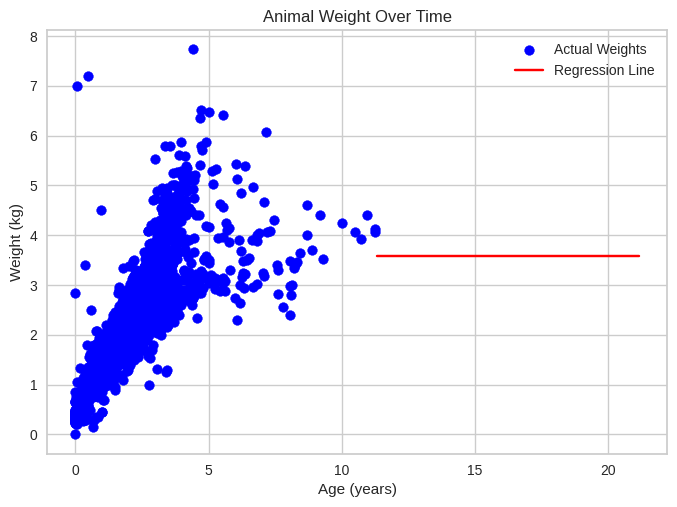

In [ ]:

pycaret_data = data.copy()

# Setup PyCaret regression
exp_reg = setup(data=pycaret_data, target='Weigh', verbose=False)

# Compare models and select the best one
best_model = compare_models()

# Finalize the model
final_model = finalize_model(best_model)

# Predict current weight
current_age = data['Age'].max()  # Replace with actual current age if different
current_age_df = pd.DataFrame({'Age': [current_age]})

# Predict the current weight
current_weight_prediction = predict_model(final_model, data=current_age_df)
print("Prediction Output for Current Age:")
print(current_weight_prediction)

# Use 'prediction_label' column for the prediction
prediction_column = 'prediction_label'
if prediction_column in current_weight_prediction.columns:
    current_weight = current_weight_prediction[prediction_column][0]
else:
    raise KeyError(f"The prediction output does not contain a '{prediction_column}' column. Check the predict_model output.")

# Predict when the animal will hit the target weight
target_weight = 3

# Generate future ages to predict when target weight will be hit
future_ages = pd.DataFrame({'Age': [current_age + i/12 for i in range(1, 12*10)]})  # Generate for next 10 years

# Predict the future weights
future_predictions = predict_model(final_model, data=future_ages)
print("Prediction Output for Future Ages:")
print(future_predictions)

# Use 'prediction_label' column for the future predictions
prediction_column_future = 'prediction_label'
if prediction_column_future in future_predictions.columns:
    # Filter future ages based on target weight
    future_ages_filtered = future_ages[future_predictions[prediction_column_future] >= target_weight]
    if not future_ages_filtered.empty:
        # Find the age when the target weight will be reached
        target_age = future_ages_filtered.iloc[0]['Age']
    else:
        target_age = None  # No age found when target weight will be reached
else:
    raise KeyError(f"The prediction output for future ages does not contain a '{prediction_column_future}' column. Check the predict_model output.")

# Print the results
print(f"Estimated weight at current age ({current_age} years): {current_weight:.2f} kg")
if target_age is not None:
    print(f"Estimated age to reach {target_weight} kg: {target_age:.2f} years")
else:
    print(f"Target weight of {target_weight} kg is not reached within the predicted timeframe.")

# Optional: Visualize the data and regression line


plt.scatter(data['Age'], data['Weigh'], color='blue', label='Actual Weights')
plt.plot(future_ages['Age'], future_predictions[prediction_column_future], color='red', label='Regression Line')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.title('Animal Weight Over Time')
plt.legend()
plt.show()


In [ ]:
holdout_pred

,Sex,Species,Origin,DOB,Date of Weigh,Weigh,Location at the Time of Weighting,Diarrhea in the past 30 days from weight collection,Status,Age,prediction_label
18680,F,Cynomolgus,Cambodia,2021-01-01,2021-10-18,1.35,InactiveMiami,No,Alive,0.793977,0.810849
38929,F,Cynomolgus,Cambodia,2023-07-05,2023-12-08,0.83,InactiveDoral,No,Alive,0.427105,0.277424
25291,F,Cynomolgus,Cambodia,2021-08-11,2024-01-25,2.25,InactiveDoral,No,Alive,2.455852,2.565359
18407,F,Cynomolgus,Cambodia,2020-12-19,2023-07-22,2.79,InactiveDoral,No,Alive,2.587269,2.683391
32010,F,Cynomolgus,Cambodia,2022-05-16,2022-05-16,0.30,InactiveMiami,No,Alive,0.000000,0.016382
...,...,...,...,...,...,...,...,...,...,...,...
38313,F,Cynomolgus,Cambodia,2023-04-17,2023-08-31,0.78,InactiveDoral,No,Alive,0.372348,0.351668
16787,F,Cynomolgus,Cambodia,2020-10-08,2023-04-27,3.15,InactiveDoral,No,Alive,2.548939,2.566152
21763,F,Cynomolgus,Cambodia,2021-05-15,2022-03-28,1.10,InactiveMiami,No,Alive,0.867899,0.841081
19412,F,Cynomolgus,Cambodia,2021-02-23,2022-10-28,2.11,InactiveMiami,No,Alive,1.675565,1.709026


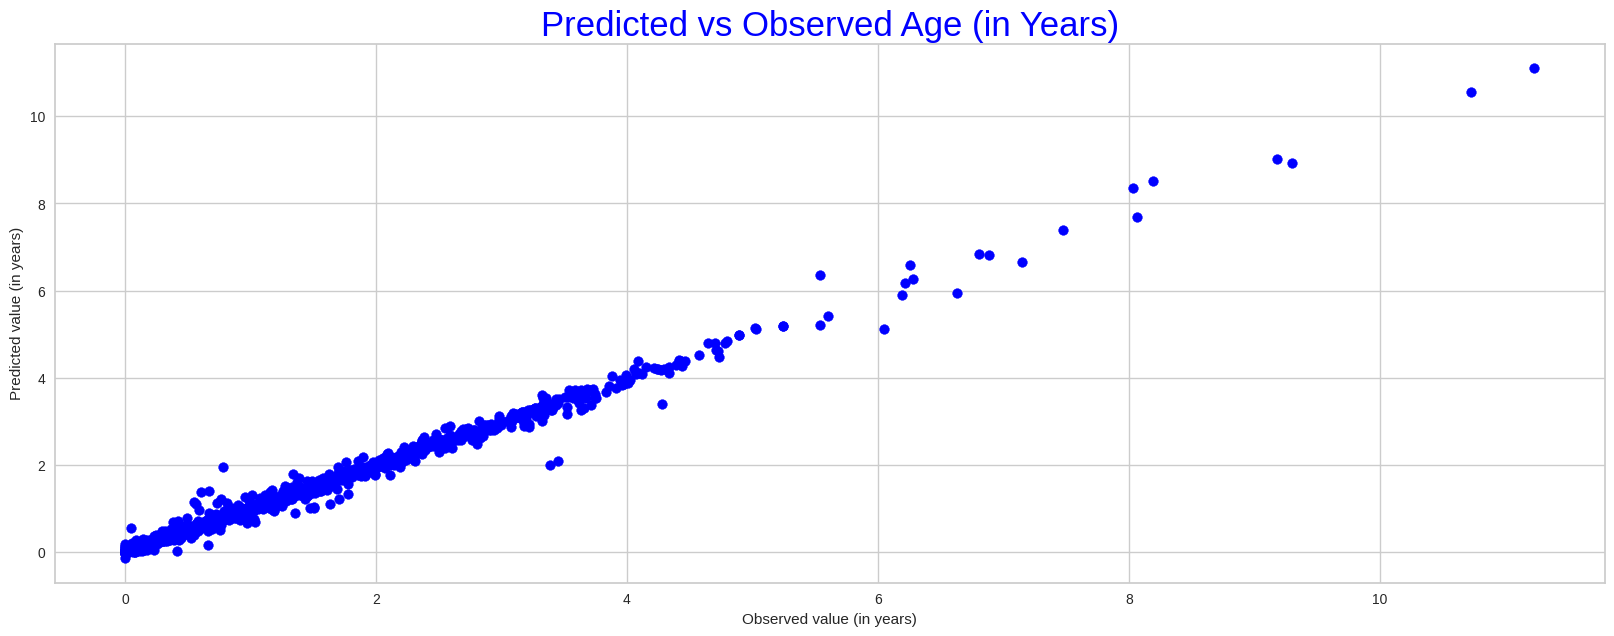

In [ ]:
plt.figure(figsize = (20, 7))
plt.scatter(holdout_pred.Age, holdout_pred.prediction_label, color='blue')
plt.ylabel('Predicted value (in years)')
plt.xlabel('Observed value (in years)')
plt.title("Predicted vs Observed Age (in Years)", size=25, color= 'blue')
plt.show()

In [ ]:
df_pred = holdout_pred[(holdout_pred.Age>2.3)& (holdout_pred.prediction_label<1.8)]

In [ ]:
df_pred

,Sex,Species,Origin,DOB,Date of Weigh,Weigh,Location at the Time of Weighting,Diarrhea in the past 30 days from weight collection,Status,Age,prediction_label


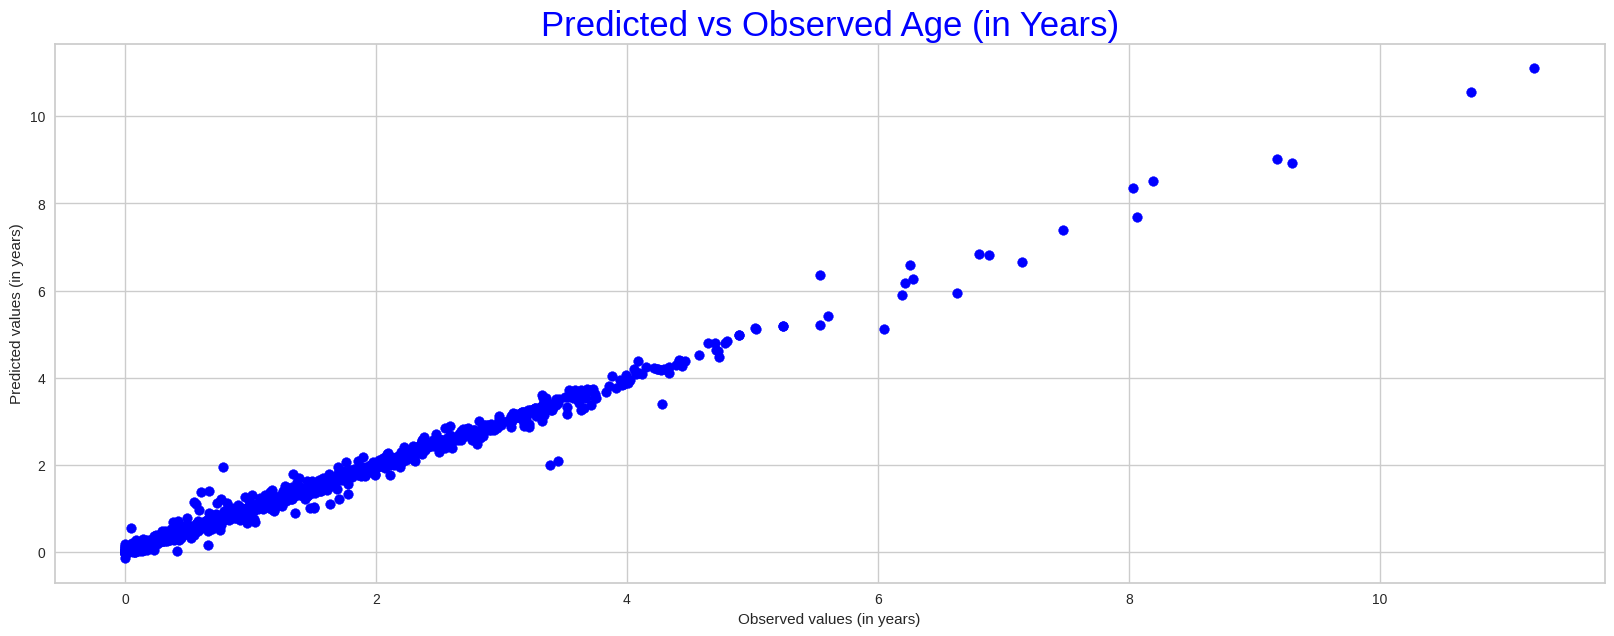

In [ ]:
plt.figure(figsize = (20, 7))
plt.scatter(holdout_pred.Age, holdout_pred.prediction_label, color='blue')
plt.scatter(df_pred.Age, df_pred.prediction_label, color='red')
plt.ylabel('Predicted values (in years)')
plt.xlabel('Observed values (in years)')
plt.title("Predicted vs Observed Age (in Years)", size=25, color= 'blue')
plt.show()

In [ ]:


# Assuming you have a DataFrame named holdout_pred
# holdout_pred = pd.DataFrame(...)  # Your DataFrame initialization

# Save the DataFrame to a CSV file
#df_pred.to_csv('df_pred.csv', index=False)

# Download the file to your local machine
#from google.colab import files
#files.download('df_pred.csv')


In [ ]:
#df_neg=df_filtered[(df_filtered['Age'] < 0)]
#df_neg.to_csv('df_neg.csv', index=False)

#from google.colab import files
#files.download('df_neg.csv')